# Homework Assignment 2

## Section 1: Admissions Dataset

In [106]:
#First round of imports

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [107]:
#data
admissions = pd.read_csv("../data/dataset-ucla-admissions.csv")

admissions.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


In [108]:
admissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
admit       400 non-null int64
gre         398 non-null float64
gpa         398 non-null float64
prestige    399 non-null float64
dtypes: float64(3), int64(1)
memory usage: 12.6 KB


**Question 1:**

What is the target/outcome variable? What are the features? Which features are continous or categorical? What is the null accuracy? If there are categorical variables, turn them into dummy variables and concatenate them with the data.

In [109]:
#Target outcome is 'admit' 0 or 1

In [110]:
#Features are ...
list(admissions.columns.values)

['admit', 'gre', 'gpa', 'prestige']

In [111]:
#Admit and Prestige is categorical - gre and gpa are continuous 

In [112]:
#Null accuracy
admissions.admit.value_counts()
print(273/400)


0.6825


In [113]:
dummies = pd.get_dummies(admissions['prestige']).rename(columns=lambda x: 'prestige_' + str(x))
admisisons = pd.concat([admissions, dummies], axis=1)
admissions.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


**Question 2:**

What do you think is the goal of using machine learning with this dataset.

In [114]:
#predict who will be admitted to university and who will not based off of the applicants gre, gpa, and prestige scores. 

**Question 3:** Make a scatter plot of gpa vs gre color-encoded using the admit feature. What does this graph tell you?

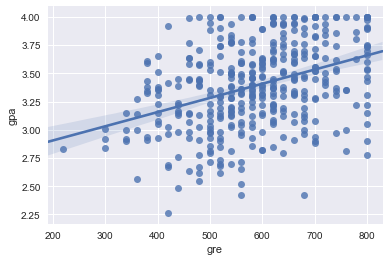

In [115]:
sns.set(color_codes='admit')
a = sns.regplot(x="gre", y="gpa", data=admissions)


**Question 4:** 

    - 1. Make a train test split using a quarter of the data for testing.
    - 2. Fit a Logistic Regression model on the training data.
    - 3. Evaluate the model on both the training and testing datasets using accuracy score.
    - 4. Whats difference in the accuracy score of training and testing datasets? Is this evidence of overfitting?

In [116]:
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification;

In [122]:
df = admissions.replace(np.nan, 0)
df.isnull().sum()

admit       0
gre         0
gpa         0
prestige    0
dtype: int64

In [124]:
X = df.drop('admit', axis=1)
y = df.admit

lr = LogisticRegression()

lr.fit(X,y)

score = lr.score(X,y)

print ("The model produces an accuracy score of {:.2f} percent".format(score*100))

The model produces an accuracy score of 71.00 percent


In [127]:
score = lr.score(X,y)
print ("The accuracy score is {:.2f} percent".format(score*100))

The accuracy score is 71.25 percent


In [128]:
X = df.drop("admit", axis=1)
y = df.admit

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state=42)

lr = LogisticRegression()
lr.fit(X_train, y_train)


preds = lr.predict(X_test)

testing_score = accuracy_score(y_test, preds)

print ("The model accurately classified {:.2f} percent of the testing data".format(testing_score*100))

The model accurately classified 72.00 percent of the testing data


In [129]:
score = lr.score(X,y)
print ("The accuracy score is {:.2f} percent".format(score*100))

The accuracy score is 71.25 percent


**Question 5:** Use grid search to determine the K-Neigbors values in a KNN model trained on this dataset and to determine the best max_depth value in a Decision Tree model as well. Which model is better? Use roc_auc as your evaluation metric.

**Question 6:** If you work in an admissions department, would you rather have a model that minimizes false negatives or minimizes false positives? Why?

**Question 7:** Using the Logistic Regression from Question 4, what is the probability of admission of the following prospective students:

    - Student 1: GRE = 560, GPA = 3.6, Prestige = 2.
    - Student 2: GRE = 750, GPA = 3.8, Prestige = 4.
    - Student 3: GRE = 660, GPA = 3.1, Prestige = 1.

## Section 2: Mystery Dataset

In this section you will work with a "mystery" supervised classification dataset, in that you have no context to work with — the names of the features come from San Francisco neighborhoods but aren't related to anything to San Francisco.

<br>

In this section I want to devise the best possible model with the fewest number of features. Some of the features are informative, while others are junk, your task is to find the good ones while dropping the bad ones.

<br>

I want you to thoroughly test at least three algorithms in order to find the best one with the best parameters.

In [16]:
data = pd.read_csv("../data/homework_2_data.csv", index_col=[0])

data.head()

,haight,mission,soma,sunset,richmond,glen_park,castro,potrero,hayes_valley,fillmore,bernal,marina,north_beach,excelsior,target
0,-3.126509,7.807749,0.959736,-2.248569,4.557675,1.110156,0.617296,0.356864,0.860267,-0.395962,-1.144975,-1.805742,1.498388,2.157730,1
1,0.941629,2.935495,-0.584966,-0.880963,-1.262072,0.120989,3.970787,2.509629,1.400017,0.574335,-3.389879,-0.898020,0.512079,4.340694,1
2,-0.724688,4.192606,-1.139602,0.856972,0.906893,-2.799484,0.584498,3.468955,1.011336,0.839612,-1.384781,-0.241726,1.502255,-1.539356,1
3,-2.641034,6.963189,0.962412,-0.838858,1.549620,-2.335671,-0.838585,1.924333,2.794306,-0.421610,-1.273275,0.833424,2.268457,-0.004678,0
4,1.259116,4.741797,1.084332,0.186698,4.794145,-1.093006,2.161358,3.264167,-0.060052,1.154145,-2.030773,-1.442986,0.588193,0.533464,1


## Section 3: Movie Revenue Prediction

Use the movie_metadata dataset to fit a regression model to predict gross. Use Linear, Polynomial, Ridge, Lasso regression. Use rMSE as your evaluation metric.

<br>

Once you've made the best possible model, I want you to pick three movies that are set to be released in January or February 2018 and use the model to predict how much revenue those movies will bring in.

In [17]:
movies = pd.read_csv("../data/movie_metadata.csv")

movies.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


## Bonus!!

<br>

Code a K-Nearest Neighbors model from scratch using just python, that means no external libraries such as numpy. This may seem daunting but it's a lot easier than you think. Hint: Use a Class to create the algorithm.